<a href="https://colab.research.google.com/github/samirangode/Segmentation-ORB-SLAM2/blob/main/Segmentation_model_zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mxnet

In [ ]:
!pip install gluoncv

In [ ]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
# using cpu
ctx = mx.cpu(0)


Example image

In [ ]:
url = 'https://github.com/zhanghang1989/image-data/blob/master/encoding/' + \
    'segmentation/ade20k/ADE_val_00001142.jpg?raw=true'
filename = 'ade20k_example.jpg'
gluoncv.utils.download(url, filename, True)

100%|██████████| 52/52 [00:00<00:00, 10527.77KB/s]


'ade20k_example.jpg'

Image from our own data

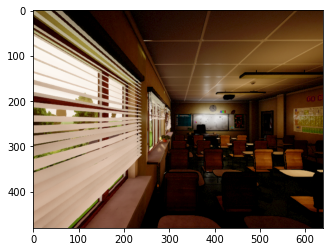

In [ ]:
#img = image.imread(filename)
img = image.imread("/content/drive/MyDrive/Localisation and Mapping/Project/record_data/2021-05-02-02-14-20/images/img_0_0_1619936060225628000.png")
from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()

In [ ]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img = test_transform(img, ctx)

Tried different models

In [ ]:
#model = gluoncv.model_zoo.get_model('psp_resnet101_ade', pretrained=True)
#model = gluoncv.model_zoo.get_model('deeplab_resnet101_ade', pretrained=True)
model = gluoncv.model_zoo.get_model('deeplab_resnet101_citys', pretrained=True)

100%|██████████| 239213/239213 [00:06<00:00, 39247.37KB/s]


In [ ]:
output = model.predict(img)
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()

In [ ]:
predict.shape

(480, 640)

In [ ]:
predict[220:]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [69., 69., 69., ...,  3.,  3.,  3.],
       [ 0.,  0., 69., ...,  3.,  3.,  3.],
       [ 0.,  0.,  0., ...,  3.,  3.,  3.]], dtype=float32)

In [ ]:
#Issue: Quite slow
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
# mask = get_color_pallete(predict, 'ade20k')
# mask.save('output.png')

In [ ]:
#mask = get_color_pallete(predict, 'ade20k')
mask = get_color_pallete(predict, 'cityscapes')
mask.save('output3.png')

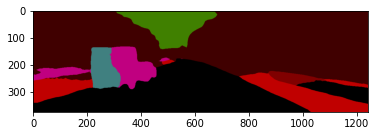

In [ ]:
mmask = mpimg.imread('output3.png')
plt.imshow(mmask)
plt.show()

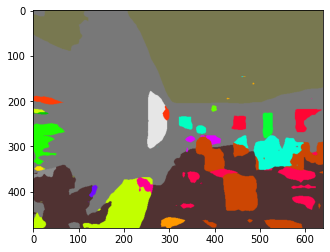

In [ ]:
mmask = mpimg.imread('output2.png')
plt.imshow(mmask)
plt.show()

Ran these models on different datasets

In [ ]:
import os
image_list = []
# directory = r'/content/drive/MyDrive/Localisation and Mapping/Project/record_data/2021-05-02-02-14-20/images'
# directory = r'/content/drive/MyDrive/Localisation and Mapping/Project/record_data/2021-05-02-23-31-56'
# directory = r'/content/drive/MyDrive/Localisation and Mapping/Project/record_data/rgb'
directory = r'/content/drive/MyDrive/Localisation and Mapping/Project/record_data/Kitti/testing/image_2'
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(directory, filename)
        print(image_path)
        image_list.append(image_path)
    else:
        continue

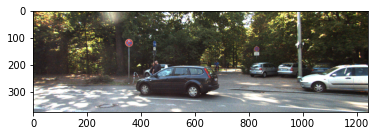

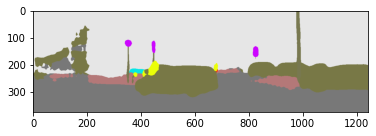

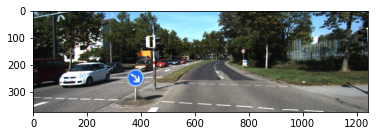

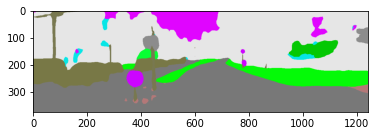

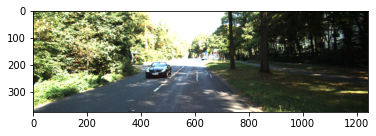

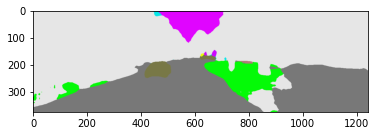

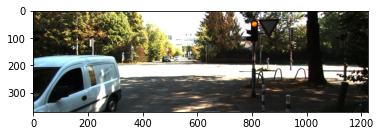

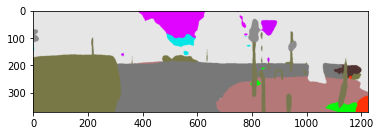

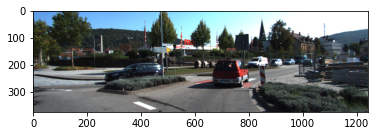

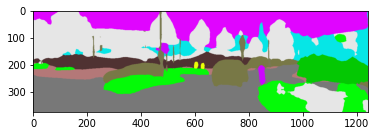

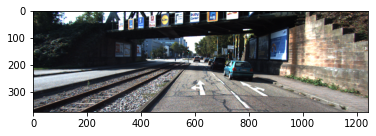

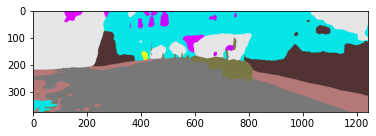

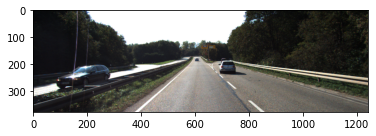

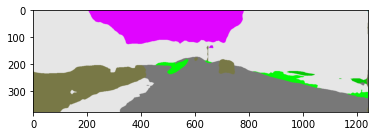

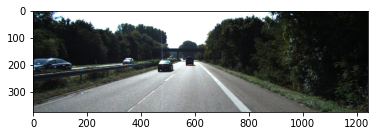

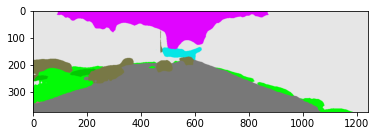

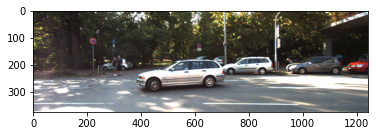

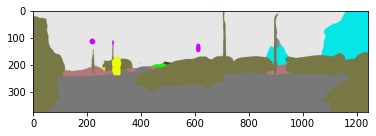

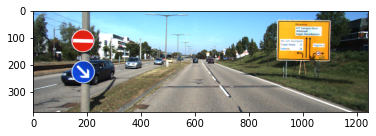

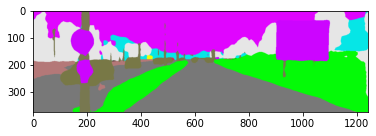

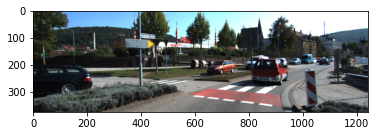

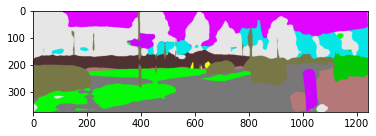

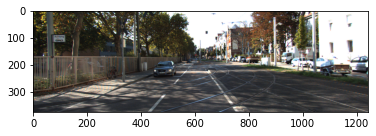

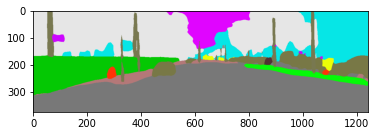

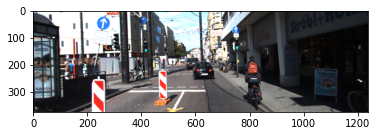

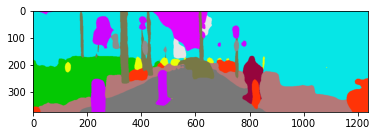

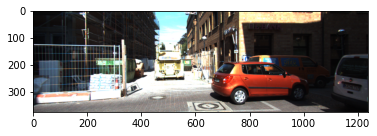

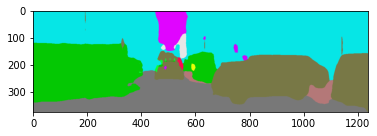

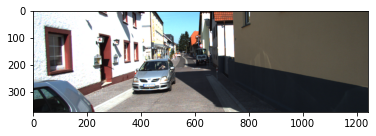

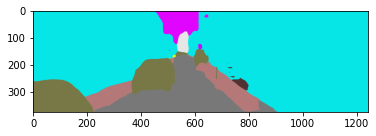

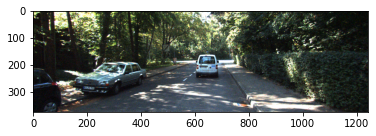

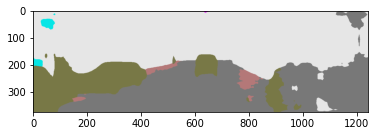

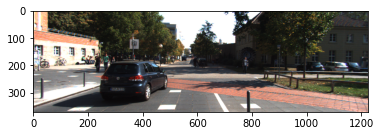

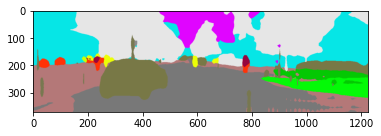

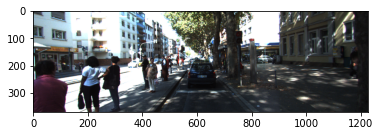

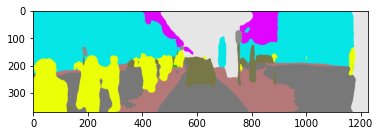

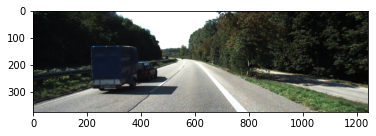

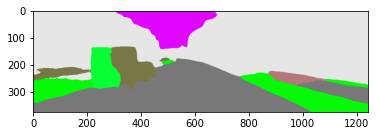

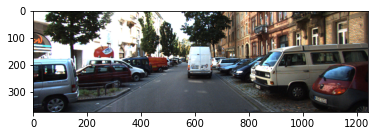

KeyboardInterrupt: ignored

In [ ]:
# for image_path in image_list:
for subdir, dirs, files in os.walk(directory):
    index = 4
    for filename in files:
        filepath = subdir + os.sep + filename

        if filepath.endswith(".jpg") or filepath.endswith(".png"):
            #print (filepath)
            img = image.imread(filepath)
            from matplotlib import pyplot as plt
            plt.imshow(img.asnumpy())
            plt.show()
            img = test_transform(img, ctx)
            output = model.predict(img)
            predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
            mask = get_color_pallete(predict, 'cityscapes')
            # out_dir = "/content/drive/MyDrive/Localisation and Mapping/Project/record_data/Segmentation_try/"
            # out_dir = "/content/drive/MyDrive/Localisation and Mapping/Project/record_data/Segmentation_Di_data/"
            # out_dir = "/content/drive/MyDrive/Localisation and Mapping/Project/record_data/Segmentation_TUM_RGB/"
            out_dir = "/content/drive/MyDrive/Localisation and Mapping/Project/record_data/Segmentation_Kitti_test/"
            out_file_name = out_dir + "output" + str(index) + ".png"
            mask.save(out_file_name)
            index += 1 
            mmask = mpimg.imread(out_file_name)
            plt.imshow(mmask)
            plt.show()

In [ ]:
test_iter = 0
for i in image_list:
  string = "output" + str(test_iter) + ".png"
  #print(f'output{test_iter}.png')
  print(string)
  test_iter += 1

In [ ]:
#print("still working")

still working
